In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import gamma
from scipy.interpolate import interp1d


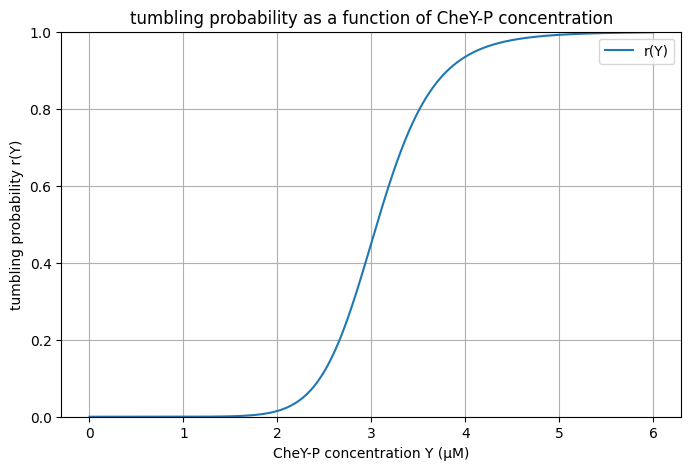

0.8106969983141018


In [2]:
#tumbling probability as a function of Y

K = 3.06e-6
epsilon2 = 40
epsilon3 = 40

def r(Y):
    return 1 / (1 + np.exp((epsilon2 / 2) - (epsilon3 * (Y / (Y + (K))))))

# Generate Y values
Y_values = np.linspace(0, 6e-6, 1000)

# Calculate r values
r_values = r(Y_values)

plt.figure(figsize=(8, 5))
plt.plot(Y_values*1e6, r_values, label="r(Y)")
plt.xlabel('CheY-P concentration Y (μM)')
plt.ylabel('tumbling probability r(Y)')
plt.title('tumbling probability as a function of CheY-P concentration')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

Y_value = 3.54e-6
print(r(Y_value))

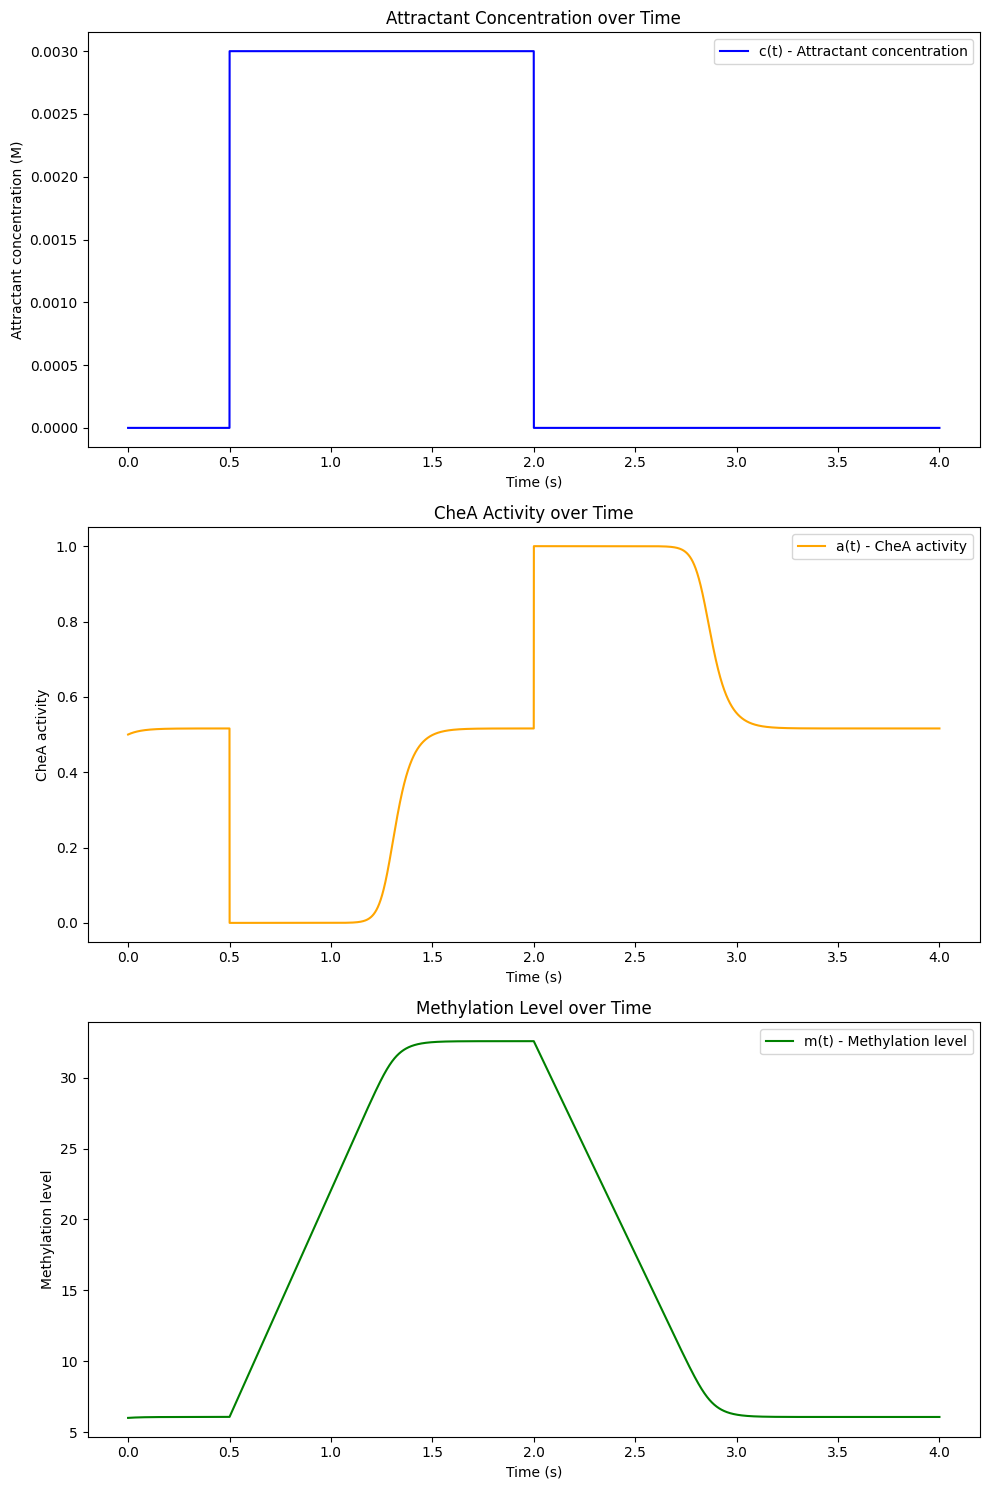

Initial values of m(t): [6.         6.0001     6.00019985 6.00029954 6.00039907 6.00049845
 6.00059768 6.00069675 6.00079567 6.00089444]
Initial values of a(t): [0.5        0.500025   0.50004996 0.50007488 0.50009977 0.50012461
 0.50014942 0.50017419 0.50019892 0.50022361]
Initial values of c(t): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:

#constants
N = 6
m0 = 6
KI = 0.0182e-3 #sneddon
KA = 3e-3
epsilon0 = 6
epsilon1 = -1 

V_R = 0.01
V_B0 = 0.013
K_R = 0.32
K_B = 0.3
a_B = 0.74
r_B = 4.0

# Time settings
dt = 0.01
T = 400
time = np.arange(0, T, dt)

# Initialize
m = np.zeros(len(time))
c = np.zeros(len(time))
a = np.zeros(len(time))

m[0] = m0 
c[0] = 0  

# Sugar concentration modeled as a time-varying function
c = (np.heaviside(time - 50, 1) 
     - (np.heaviside(time - 200, 1))
     ) * (10**-3)*3

def f_m(m):
    return (epsilon0 + (epsilon1 * m))

def f_c(c):
    return np.log((1 + c / KI) / (1 + c / KA))

def cheA_activity(m, c):
    return 1 / (1 + np.exp((f_m(m) +(N*f_c(c)))))

#def dm_dt(a, m):
#    return (V_R * ((1 - a) / (K_R + 1 - a))) - (V_B(a) * (a / (K_B + a)))

def dm_dt(a, m):
    return ((1-a)*K_R) -(K_B*a)

def heaviside(x):
    return 1 if x >= 0 else 0

def V_B(a):
    return V_B0 * (1 + (heaviside(a - a_B) * ((a - a_B) / (1 - a_B)) * r_B))


# Simulation loop
for i in range(1, len(time)):
    a[i - 1] = cheA_activity(m[i - 1], c[i - 1])
    m[i] = m[i - 1] + dt * dm_dt(a[i-1], m[i-1])
    if i == len(time) - 1:
        a[i] = cheA_activity(m[i], c[i])

fig, axs = plt.subplots(3, 1, figsize=(10, 15))  

axs[2].plot(time*dt, m, label='m(t) - Methylation level', color='green')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Methylation level')
axs[2].set_title('Methylation Level over Time')
axs[2].legend()

axs[1].plot(time*dt, a, label='a(t) - CheA activity', color='orange')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('CheA activity')
axs[1].set_title('CheA Activity over Time')
axs[1].legend()

axs[0].plot(time*dt, c, label='c(t) - Attractant concentration', color='blue')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Attractant concentration (M)')
axs[0].set_title('Attractant Concentration over Time')
axs[0].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Print initial values for verification
print("Initial values of m(t):", m[:10])
print("Initial values of a(t):", a[:10])
print("Initial values of c(t):", c[:10])


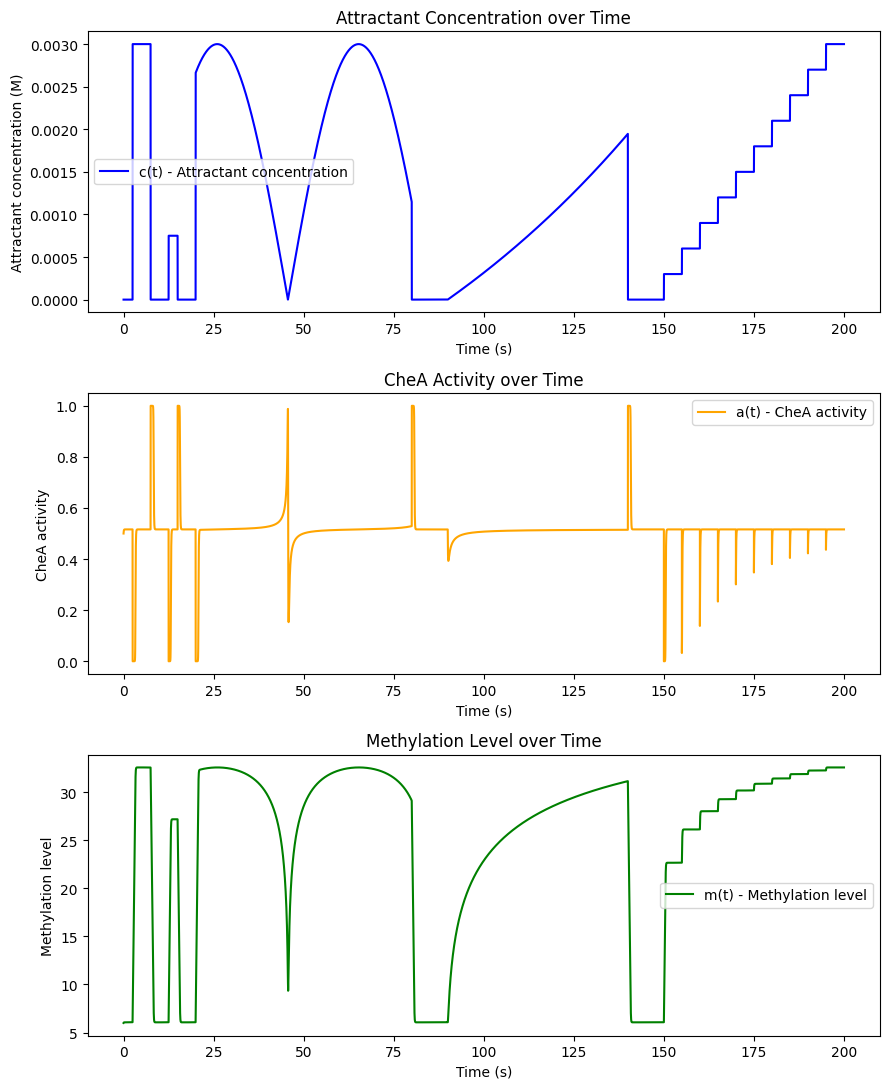

Initial values of m(t): [6.         6.0001     6.00019985 6.00029954 6.00039907 6.00049845
 6.00059768 6.00069675 6.00079567 6.00089444]
Initial values of a(t): [0.5        0.500025   0.50004996 0.50007488 0.50009977 0.50012461
 0.50014942 0.50017419 0.50019892 0.50022361]
Initial values of c(t): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
#constants 
N = 6
m0 = 6
KI = 0.0182e-3
KA = 3e-3
epsilon0 = 6
epsilon1 = -1 

V_R = 0.01
V_B0 = 0.013
kR = 0.32
kB = 0.3
a_B = 0.74
r_B = 4.0


# Time settings
dt = 0.01
T = 20000
time = np.arange(0, T, dt)

# Initialize
m = np.zeros(len(time))
c = np.zeros(len(time))
a = np.zeros(len(time))

m[0] = m0 
c[0] = 0

# Sugar concentration modeled as a time-varying function
c = (np.heaviside(time - 250, 1) 
     - (np.heaviside(time - 750, 1))
     + (np.heaviside(time - 1250, 1)*0.25) 
     - ((np.heaviside(time - 1500, 1))*0.25)
     + np.heaviside(time - 2000, 1) * abs(np.sin((0.0008 * time) -(0.0008*2000/np.pi)))
     - np.heaviside(time - 8000, 1) * abs(np.sin((0.0008 * time) -(0.0008*2000/np.pi)))
     + np.heaviside(time - 9000, 1) * (np.exp(0.0001 * (time - 9000)) - 1)
     - np.heaviside(time - 14000, 1) * (np.exp(0.0001 * (time - 9000)) - 1)
     + np.heaviside(time - 15000, 1)*0.1 
     - (np.heaviside(time - 15500, 1))*0.1
     + np.heaviside(time - 15500, 1)*0.2 
     - (np.heaviside(time - 16000, 1))*0.2
     + np.heaviside(time - 16000, 1)*0.3 
     - (np.heaviside(time - 16500, 1))*0.3
     + np.heaviside(time - 16500, 1)*0.4 
     - (np.heaviside(time - 17000, 1))*0.4
     + np.heaviside(time - 17000, 1)*0.5 
     - (np.heaviside(time - 17500, 1))*0.5
     + np.heaviside(time - 17500, 1)*0.6 
     - (np.heaviside(time - 18000, 1))*0.6
     + np.heaviside(time - 18000, 1)*0.7 
     - (np.heaviside(time - 18500, 1))*0.7
     + np.heaviside(time - 18500, 1)*0.8 
     - (np.heaviside(time - 19000, 1))*0.8
     + np.heaviside(time - 19000, 1)*0.9 
     - (np.heaviside(time - 19500, 1))*0.9
     + np.heaviside(time - 19500, 1) 
     - (np.heaviside(time - 20000, 1))
     ) * (10**-3)*3

def f_m(m):
    return (epsilon0 + (epsilon1 * m))

def f_c(c):
    return np.log((1 + c / KI) / (1 + c / KA))

def cheA_activity(m, c):
    return 1 / (1 + np.exp((f_m(m) +(N*f_c(c)))))

# Simulation loop
for i in range(1, len(time)):
    a[i - 1] = cheA_activity(m[i - 1], c[i - 1])
    m[i] = m[i - 1] + dt * (((1 - a[i - 1]) * kR) - (kB * a[i - 1]))
    if i == len(time) - 1:
        a[i] = cheA_activity(m[i], c[i])

fig, axs = plt.subplots(3, 1, figsize=(9, 11))

axs[2].plot(time*dt, m, label='m(t) - Methylation level', color='green')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Methylation level')
axs[2].set_title('Methylation Level over Time')
axs[2].legend()

axs[1].plot(time*dt, a, label='a(t) - CheA activity', color='orange')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('CheA activity')
axs[1].set_title('CheA Activity over Time')
axs[1].legend()

axs[0].plot(time*dt, c, label='c(t) - Attractant concentration', color='blue')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Attractant concentration (M)')
axs[0].set_title('Attractant Concentration over Time')
axs[0].legend()

plt.tight_layout()
plt.show()

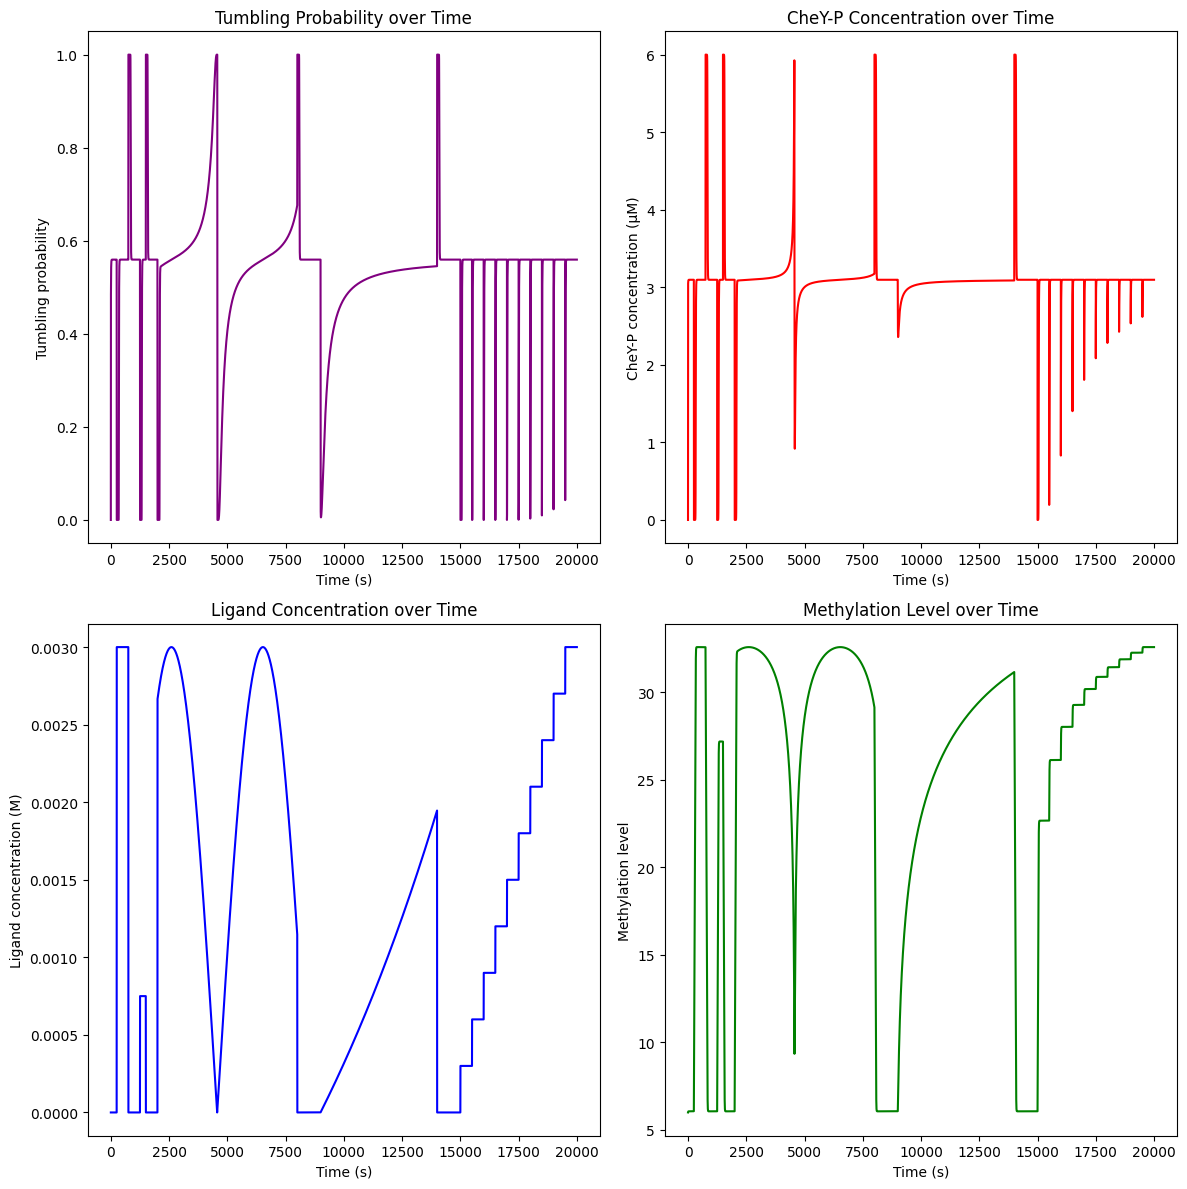

Initial values of m(t): [6.         6.0001     6.00019985 6.00029954 6.00039907 6.00049845
 6.00059768 6.00069675 6.00079567 6.00089444]
Initial values of a(t): [0.5        0.500025   0.50004996 0.50007488 0.50009977 0.50012461
 0.50014942 0.50017419 0.50019892 0.50022361]
Initial values of c(t): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Initial values of Y(t): [0.00000000e+00 3.00000000e-06 3.00015000e-06 3.00029977e-06
 3.00044930e-06 3.00059861e-06 3.00074768e-06 3.00089652e-06
 3.00104513e-06 3.00119351e-06]
Initial values of r(Y): [0.         0.40226424 0.40250468 0.40274478 0.40298455 0.40322398
 0.40346307 0.40370183 0.40394025 0.40417833]


In [5]:
###Expanded model analysis

# Constants
N = 6
m0 = 6
KI = 0.0182e-3
KA = 3e-3
alpha = 6e-6
K = 3.06e-6
epsilon0 = 6
epsilon1 = -1 
epsilon2 = 80
epsilon3 = 80
omega = 1.3

V_R = 0.01
V_B0 = 0.013
K_R = 0.32
K_B = 0.3
a_B = 0.74
r_B = 4.0

duration = 20000
dt = 0.01
time = np.arange(0, duration, dt)

# Initialize
m = np.zeros(len(time))
c = np.zeros(len(time))
a = np.zeros(len(time))
Y = np.zeros(len(time))
r_Y = np.zeros(len(time))

m[0] = m0  
Y[0] = 0 

c = (np.heaviside(time - 250, 1) 
     - (np.heaviside(time - 750, 1))
     + (np.heaviside(time - 1250, 1)*0.25) 
     - ((np.heaviside(time - 1500, 1))*0.25)
     + np.heaviside(time - 2000, 1) * abs(np.sin((0.0008 * time) -(0.0008*2000/np.pi)))
     - np.heaviside(time - 8000, 1) * abs(np.sin((0.0008 * time) -(0.0008*2000/np.pi)))
     + np.heaviside(time - 9000, 1) * (np.exp(0.0001 * (time - 9000)) - 1)
     - np.heaviside(time - 14000, 1) * (np.exp(0.0001 * (time - 9000)) - 1)
     + np.heaviside(time - 15000, 1)*0.1 
     - (np.heaviside(time - 15500, 1))*0.1
     + np.heaviside(time - 15500, 1)*0.2 
     - (np.heaviside(time - 16000, 1))*0.2
     + np.heaviside(time - 16000, 1)*0.3 
     - (np.heaviside(time - 16500, 1))*0.3
     + np.heaviside(time - 16500, 1)*0.4 
     - (np.heaviside(time - 17000, 1))*0.4
     + np.heaviside(time - 17000, 1)*0.5 
     - (np.heaviside(time - 17500, 1))*0.5
     + np.heaviside(time - 17500, 1)*0.6 
     - (np.heaviside(time - 18000, 1))*0.6
     + np.heaviside(time - 18000, 1)*0.7 
     - (np.heaviside(time - 18500, 1))*0.7
     + np.heaviside(time - 18500, 1)*0.8 
     - (np.heaviside(time - 19000, 1))*0.8
     + np.heaviside(time - 19000, 1)*0.9 
     - (np.heaviside(time - 19500, 1))*0.9
     + np.heaviside(time - 19500, 1) 
     - (np.heaviside(time - 20000, 1))
     ) * (10**-3)*3


def cheA_activity(m, c):
    return 1 / (1 + np.exp((f_m(m) + f_c(c))))

def f_m(m):
    return (epsilon0 + (epsilon1 * m))

def f_c(c):
    return N * np.log((1 + (c / KI)) / (1 + (c / KA)))

#def dm_dt(a, m):
#    return (V_R * ((1 - a) / (K_R + 1 - a))) - (V_B(a) * (a / (K_B + a)))

def dm_dt(a, m):
    return ((1-a)*K_R) -(K_B*a)

def heaviside(x):
    return 1 if x >= 0 else 0

def V_B(a):
    return V_B0 * (1 + (heaviside(a - a_B) * ((a - a_B) / (1 - a_B)) * r_B))

def CheY_P(a):
    return alpha * a

def G(Y):
    return (epsilon2 / 4) - ((epsilon3 / 2) * (1 / (1 + K / Y)))

def r(Y):
    return 1 / (1 + np.exp((epsilon2 / 2) - (epsilon3 * (1 / (1 + (K/Y))))))

for i in range(1, len(time)):
    a[i - 1] = cheA_activity(m[i - 1], c[i - 1])
    m[i] = m[i - 1] + dt * dm_dt(a[i - 1], m[i - 1])
    Y[i] = CheY_P(a[i - 1])
    r_Y[i] = r(Y[i])
    if i == len(time) - 1:
        a[i] = cheA_activity(m[i], c[i])

fig, axs = plt.subplots(2, 2, figsize=(12, 12)) 

axs[0, 0].plot(time, r_Y, label='r(Y) - Tumbling probability', color='purple')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Tumbling probability')
axs[0, 0].set_title('Tumbling Probability over Time')

axs[0, 1].plot(time, Y*1e6, label='Y(t) - CheY-P concentration', color='red')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('CheY-P concentration (μM)')
axs[0, 1].set_title('CheY-P Concentration over Time')

axs[1, 0].plot(time, c, label='c(t) - Ligand concentration', color='blue')
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].set_ylabel('Ligand concentration (M)')
axs[1, 0].set_title('Ligand Concentration over Time')

axs[1, 1].plot(time, m, label='m(t) - Methylation level', color='green')
axs[1, 1].set_xlabel('Time (s)')
axs[1, 1].set_ylabel('Methylation level')
axs[1, 1].set_title('Methylation Level over Time')

plt.tight_layout()
plt.show()


print("Initial values of m(t):", m[:10])
print("Initial values of a(t):", a[:10])
print("Initial values of c(t):", c[:10])
print("Initial values of Y(t):", Y[:10])
print("Initial values of r(Y):", r_Y[:10])


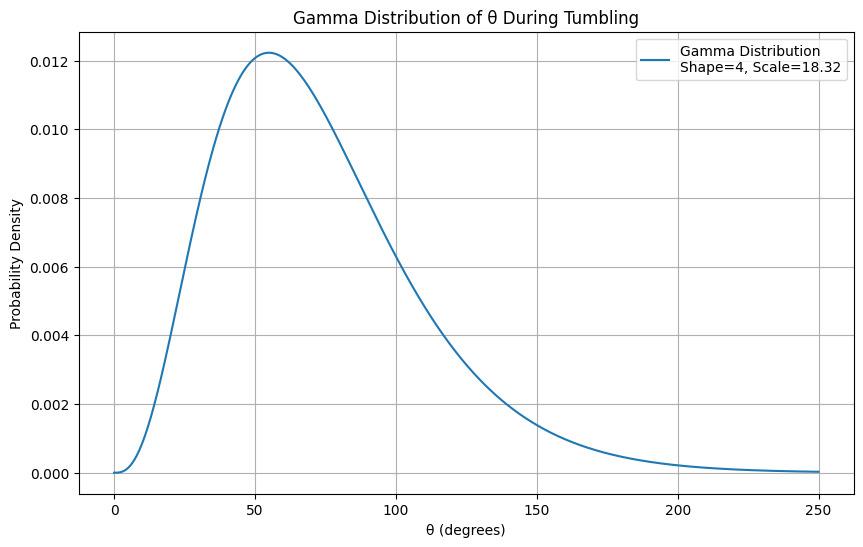

In [6]:
#gamma distribution for angle picking

shape_param = 4
scale_param = 18.32

x = np.linspace(0, 250, 1000)

pdf = gamma.pdf(x, a=shape_param, scale=scale_param)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Gamma Distribution\nShape={shape_param}, Scale={scale_param}')

plt.title('Gamma Distribution of θ During Tumbling')
plt.xlabel('θ (degrees)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.show()

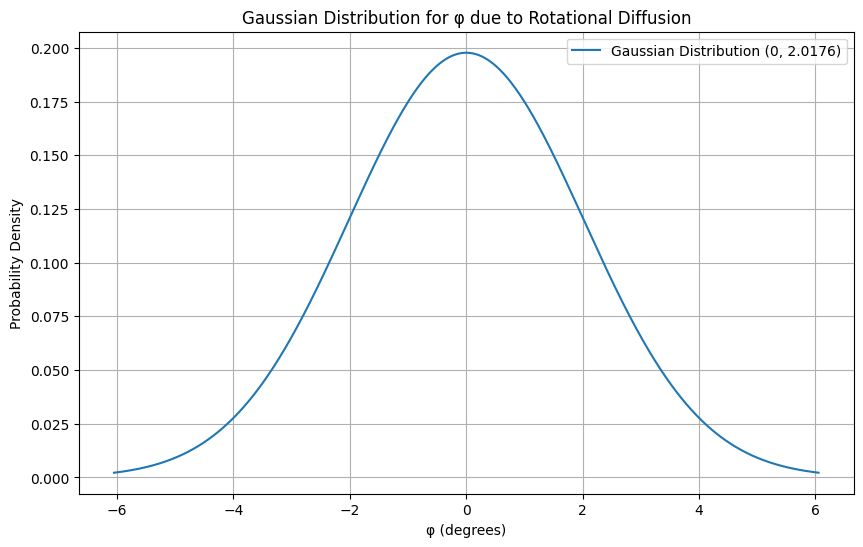

In [7]:
#rotational diffusion impact on trajectory 

#constants
D_r = 0.062  # rad^2/s
dt = 0.01  # s

#standard deviation for rotational diffusion
sigma_rotational_diffusion = np.sqrt(2 * D_r * dt)

mean = 0
std_dev = np.degrees(sigma_rotational_diffusion)

x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

y_values = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values - mean) / std_dev)**2)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f'Gaussian Distribution (0, {std_dev:.4f})')
plt.title('Gaussian Distribution for φ due to Rotational Diffusion')
plt.xlabel('φ (degrees)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Total path length: 9999.799999999996 micrometer
Euclidean distance from start to end: 797.5010965343093 in micrometer
Total time: 500 s


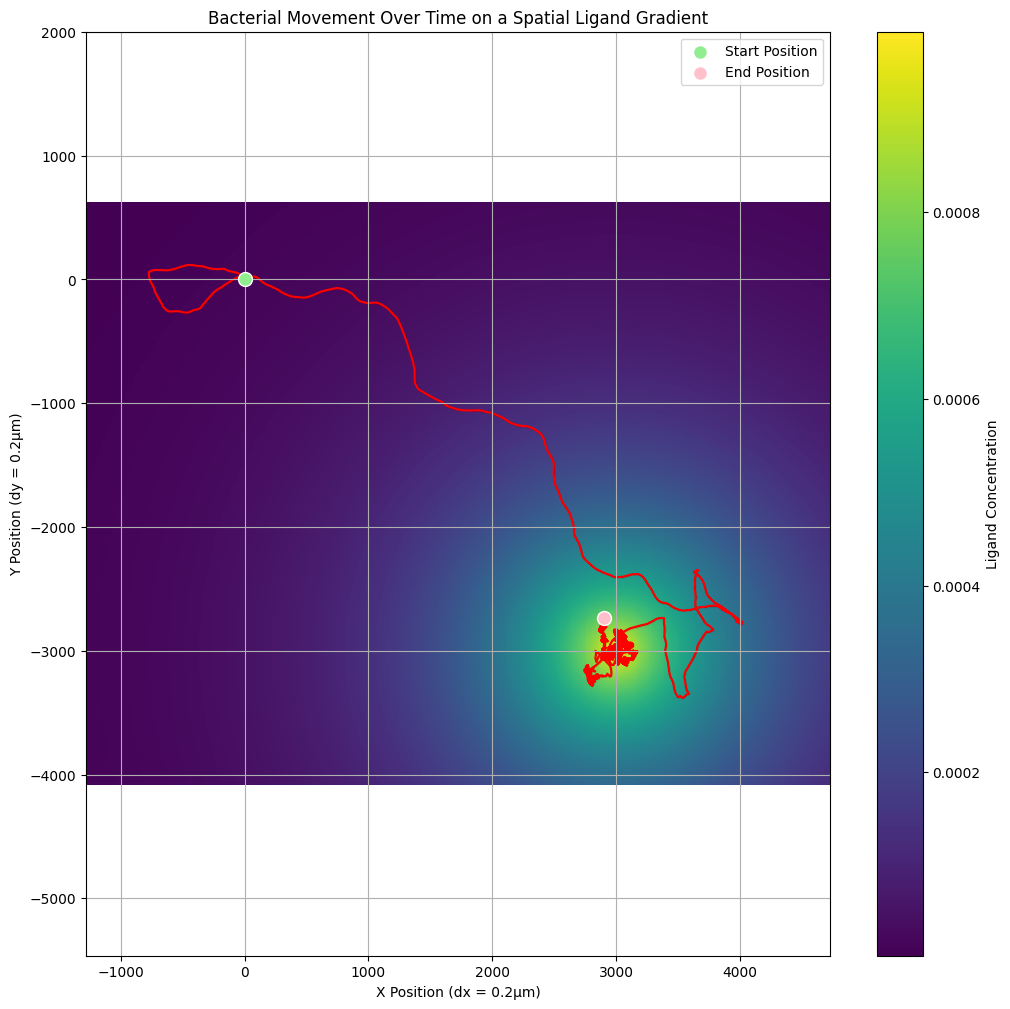

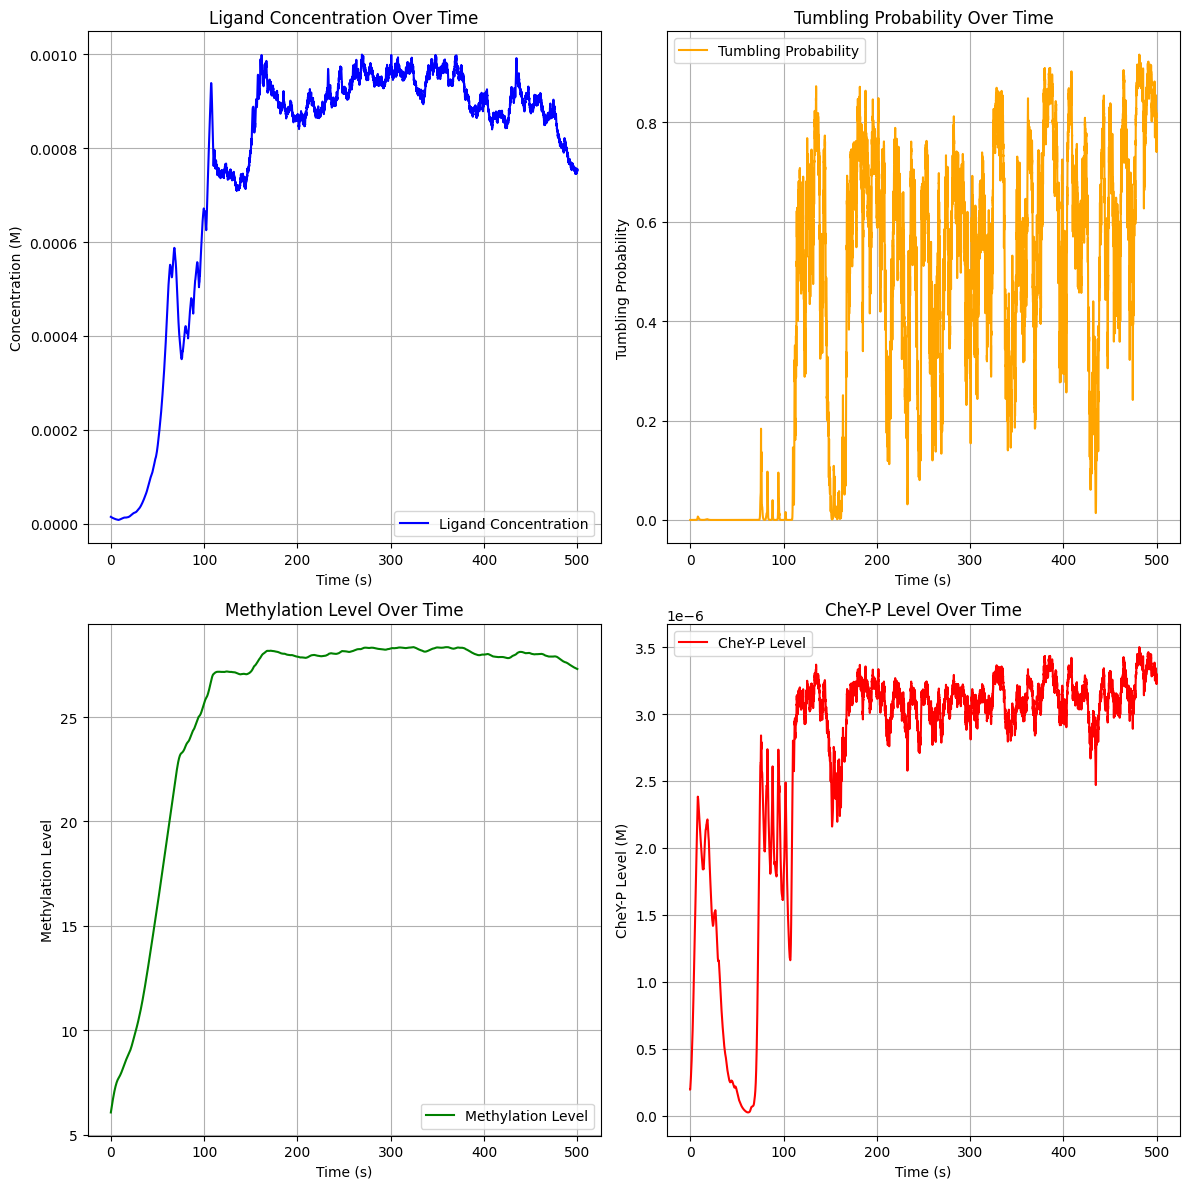

In [10]:
#####Revised model including CheY, non-linearized methylation and improved tumbling probability concentration #####fully new model 

#constant velocity of 20micrometer/s, so stepsize/dt = 20micrometer/s with dt =0.01, stepsize of 1 then equals 0.2micrometer. In other words, each dx, dy equals 0.2 micrometer.

# Constants
N = 6
m0 = 6.064538509124047
KI = 0.0182e-3
KA = 3e-3
alpha = 6e-6
K = 3.06e-6
epsilon0 = 6
epsilon1 = -1 
epsilon2 = 80
epsilon3 = 80
omega = 1.3

V_R = 0.01
V_B0 = 0.013
K_R = 0.32
K_B = 0.3
a_B = 0.74
r_B = 4.0

D_r = 0.062 # rad^2/s

step_size = 1
distance_per_step = 0.2 #micrometers

duration = 500
dt = 0.01
time = np.arange(0, duration, dt)
initial_position = [0, 0]

# Gamma distribution parameters for direction change
shape_param = 4
scale_param = 18.32 * (np.pi / 180)

def sugar_concentration(positions):
    X, Y = positions
    source_position = np.array([3000, -3000]) 
    decay_rate = 0.001  # Adjust the decay rate as needed
    x0, y0 = source_position
    distance = np.sqrt((X - x0)**2 + (Y - y0)**2)
    concentration = np.exp(-decay_rate * distance)*1e-3
    return concentration

# Function definitions for the revised model
def cheA_activity(m, c):
    return 1 / (1 + np.exp((f_m(m) + f_c(c))))

def f_m(m):
    return (epsilon0 + (epsilon1 * m))

def f_c(c):
    return N * np.log((1 + (c / KI)) / (1 + (c / KA)))

#def dm_dt(a, m):    ### this the non-linearized version.
#    return (V_R * ((1 - a) / (K_R + 1 - a))) - (V_B(a) * (a / (K_B + a)))

def dm_dt(a, m):
    return ((1-a)*K_R) -(K_B*a)

def heaviside(x):
    return 1 if x >= 0 else 0

def V_B(a):
    return V_B0 * (1 + (heaviside(a - a_B) * ((a - a_B) / (1 - a_B)) * r_B))

def CheY_P(a):
    return alpha * a

def G(Y):
    return (epsilon2 / 4) - ((epsilon3 / 2) * (1 / (1 + K / Y)))

def r(Y):
    return 1 / (1 + np.exp((epsilon2 / 2) - (epsilon3 * (1 / (1 + (K/Y))))))

def get_new_direction(prev_direction, shape, scale):
    delta = np.random.gamma(shape, scale)
    if np.random.rand() < 0.5:
        delta = -delta
    new_direction = prev_direction + delta
    new_direction = new_direction % (2 * np.pi) 
    return new_direction

def simulate_movement_with_CheY(duration, dt, initial_position, step_size=step_size):
    sigma_rotational_diffusion = np.sqrt(2 * D_r * dt)

    positions = [np.array(initial_position)]
    direction = 3*np.pi / 4 # -np.pi/4 is the right direction for source at [3000, -3000], 3*np.pi/4 is the opposite direction
    sugar_concentrations = [sugar_concentration(initial_position)]
    methylation_levels = [m0]  # Starting methylation level
    CheA_activities = [cheA_activity(methylation_levels[0], sugar_concentrations[0])]
    CheY_levels = [CheY_P(CheA_activities[0])]
    
    tumbling_probabilities = [r(CheY_levels[0])]

    for _ in range(1, len(time)):
        position = positions[-1]
        current_sugar_concentration = sugar_concentration(position)
        sugar_concentrations.append(current_sugar_concentration)
        
        current_CheA_activity = cheA_activity(methylation_levels[-1], current_sugar_concentration)
        CheA_activities.append(current_CheA_activity)
        
        current_CheY_level = CheY_P(current_CheA_activity)
        CheY_levels.append(current_CheY_level)

        current_methylation_level = methylation_levels[-1] + dt * dm_dt(current_CheA_activity, methylation_levels[-1])
        methylation_levels.append(current_methylation_level)

        tumble_probability = r(current_CheY_level)
        tumbling_probabilities.append(tumble_probability)
        if np.random.rand() < tumble_probability:
            direction = get_new_direction(direction, shape_param, scale_param)

        rotational_diffusion_angle = np.random.normal(0, sigma_rotational_diffusion)
        direction += rotational_diffusion_angle
        direction = direction % (2 * np.pi) 
            
        new_position = position + (step_size * np.array([np.cos(direction), np.sin(direction)]))
        positions.append(new_position)

    return np.array(positions), np.array(sugar_concentrations), np.array(methylation_levels), np.array(CheA_activities), np.array(time), np.array(CheY_levels), np.array(tumbling_probabilities)

positions, sugar_concentrations, methylation_levels, CheA_activities, time, CheY_levels, tumbling_probabilities = simulate_movement_with_CheY(duration, dt, initial_position)

total_path_length = np.sum(np.sqrt(np.sum(np.diff(positions, axis=0)**2, axis=1)))

# Calculate Euclidean distance between start and end positions
start_position = positions[0]
end_position = positions[-1]
euclidean_distance = np.sqrt(np.sum((end_position - start_position)**2)) *distance_per_step

print(f"Total path length: {total_path_length*distance_per_step} micrometer")
print(f"Euclidean distance from start to end: {euclidean_distance} in micrometer")
print(f"Total time: {duration} s")


x_min, x_max = positions[:, 0].min() - 500, positions[:, 0].max() + 700
y_min, y_max = positions[:, 1].min() - 700, positions[:, 1].max() + 500

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)

Z = sugar_concentration([X.ravel(), Y.ravel()]).reshape(X.shape)

plt.figure(figsize=(12, 12))  
plt.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar(label='Ligand Concentration')
plt.plot(positions[:, 0], positions[:, 1], marker='o', markersize=0.01, color='red', zorder=1)
plt.scatter(positions[0, 0], positions[0, 1], color='lightgreen', s=100, edgecolor='white', label='Start Position', zorder=3)
plt.scatter(positions[-1, 0], positions[-1, 1], color='pink', s=100, edgecolor='white', label='End Position', zorder=3)
plt.title('Bacterial Movement Over Time on a Spatial Ligand Gradient')
plt.xlabel('X Position (dx = 0.2μm)')
plt.ylabel('Y Position (dy = 0.2μm)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 12))  
plt.subplot(2, 2, 3)
plt.plot(time, methylation_levels, 'g-', label='Methylation Level')
plt.title('Methylation Level Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Methylation Level')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time, tumbling_probabilities, 'orange', label='Tumbling Probability')
plt.title('Tumbling Probability Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Tumbling Probability')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 1)
plt.plot(time, sugar_concentrations, 'blue', label='Ligand Concentration')
plt.title('Ligand Concentration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time, CheY_levels, 'red', label='CheY-P Level')
plt.title('CheY-P Level Over Time')
plt.xlabel('Time (s)')
plt.ylabel('CheY-P Level (M)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


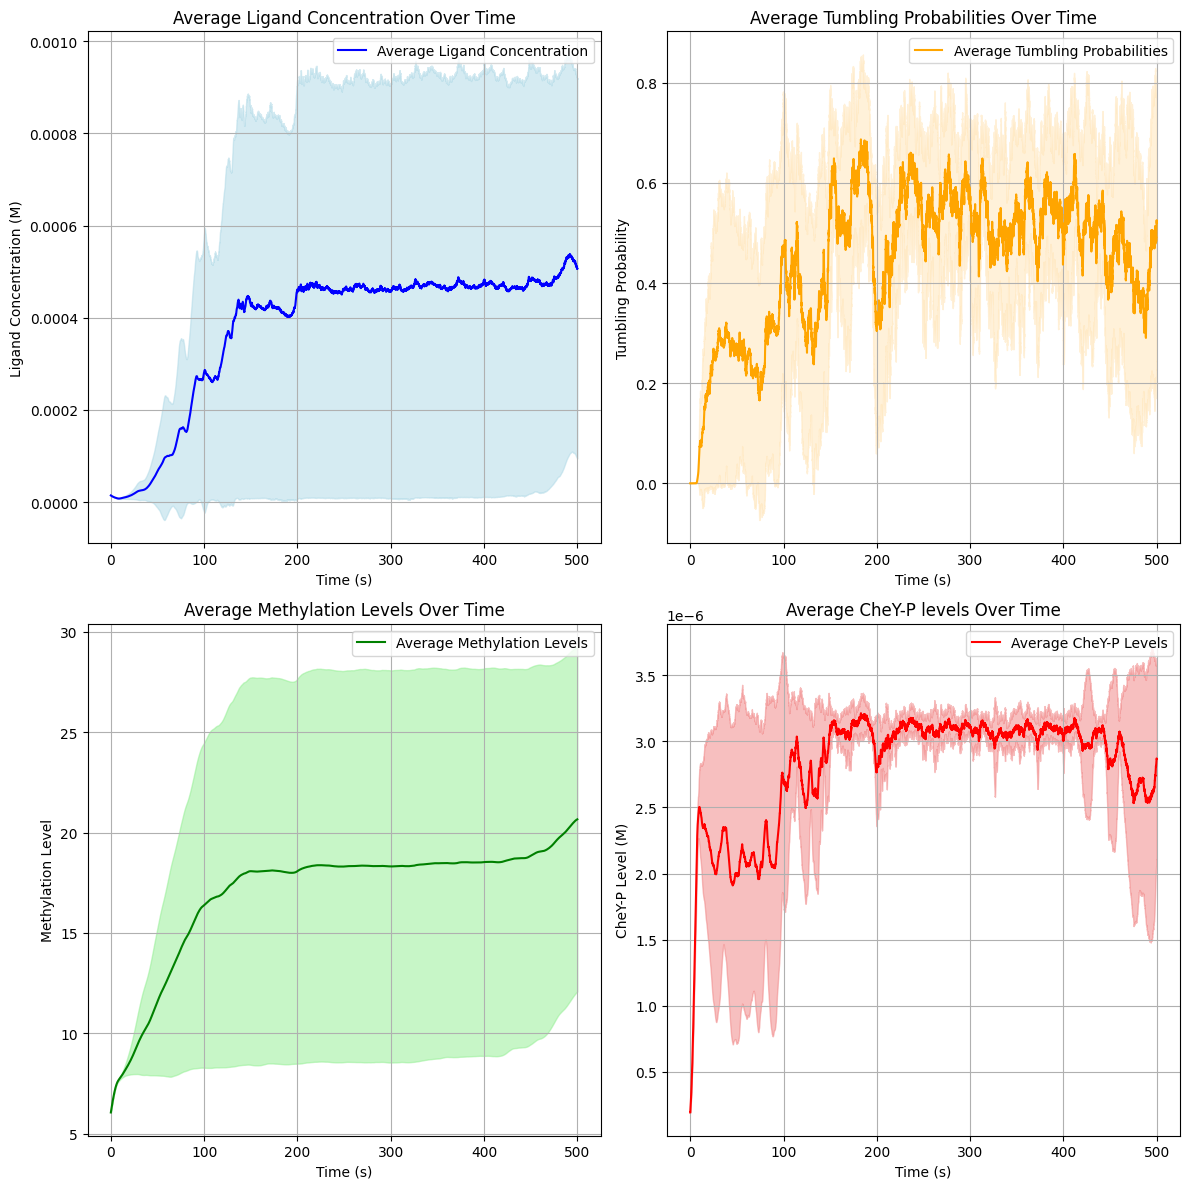

In [11]:
###Averaging many runs of the previous model
##note: redefine and rerun previous code block for different starting conditions such as initialized direction

num_runs = 1000

def run_multiple_simulations(num_runs, duration, dt, initial_position, step_size=0.5):
    all_sugar_concentrations = []
    all_methylation_levels = []
    all_CheY_levels = []
    all_tumbling_probabilities = []

    for _ in range(num_runs):
        positions, sugar_concentrations, methylation_levels, CheA_activities, time, CheY_levels, tumbling_probabilities = simulate_movement_with_CheY(duration, dt, initial_position, step_size)
        all_sugar_concentrations.append(sugar_concentrations)
        all_methylation_levels.append(methylation_levels)
        all_CheY_levels.append(CheY_levels)
        all_tumbling_probabilities.append(tumbling_probabilities)

    avg_sugar_concentrations = np.mean(np.array(all_sugar_concentrations), axis=0)
    avg_methylation_levels = np.mean(np.array(all_methylation_levels), axis=0)
    avg_CheY_levels = np.mean(np.array(all_CheY_levels), axis=0)
    avg_tumbling_probabilities = np.mean(np.array(all_tumbling_probabilities), axis=0)

    std_sugar_concentrations = np.std(np.array(all_sugar_concentrations), axis=0)
    std_methylation_levels = np.std(np.array(all_methylation_levels), axis=0)
    std_CheY_levels = np.std(np.array(all_CheY_levels), axis=0)
    std_tumbling_probabilities = np.std(np.array(all_tumbling_probabilities), axis=0)

    return avg_sugar_concentrations, avg_methylation_levels, avg_CheY_levels, avg_tumbling_probabilities,std_sugar_concentrations, std_methylation_levels, std_CheY_levels, std_tumbling_probabilities, all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities

avg_sugar_concentrations, avg_methylation_levels, avg_CheY_levels, avg_tumbling_probabilities, std_sugar_concentrations, std_methylation_levels, std_CheY_levels, std_tumbling_probabilities, all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities = run_multiple_simulations(num_runs, duration, dt, initial_position, step_size)

num_time_steps = len(avg_sugar_concentrations)  
time_array = np.arange(0, duration, dt)

plt.figure(figsize=(12, 12))  

plt.subplot(2, 2, 1)  
plt.plot(time_array, avg_sugar_concentrations, color='blue', label='Average Ligand Concentration')
plt.fill_between(time_array, avg_sugar_concentrations - std_sugar_concentrations, avg_sugar_concentrations + std_sugar_concentrations, color='lightblue', alpha=0.5)
plt.title('Average Ligand Concentration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Ligand Concentration (M)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)  
plt.plot(time_array, avg_methylation_levels, color='green', label='Average Methylation Levels')
plt.fill_between(time_array, avg_methylation_levels - std_methylation_levels, avg_methylation_levels + std_methylation_levels, color='lightgreen', alpha=0.5)
plt.title('Average Methylation Levels Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Methylation Level')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4) 
plt.plot(time_array, avg_CheY_levels, color='red', label='Average CheY-P Levels')
plt.fill_between(time_array, avg_CheY_levels - std_CheY_levels, avg_CheY_levels + std_CheY_levels, color='lightcoral', alpha=0.5)
plt.title('Average CheY-P levels Over Time')
plt.xlabel('Time (s)')
plt.ylabel('CheY-P Level (M)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)  
plt.plot(time_array, avg_tumbling_probabilities, color='orange', label='Average Tumbling Probabilities')
plt.fill_between(time_array, avg_tumbling_probabilities - std_tumbling_probabilities, avg_tumbling_probabilities + std_tumbling_probabilities, color='moccasin', alpha=0.5)
plt.title('Average Tumbling Probabilities Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Tumbling Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()  
plt.show()



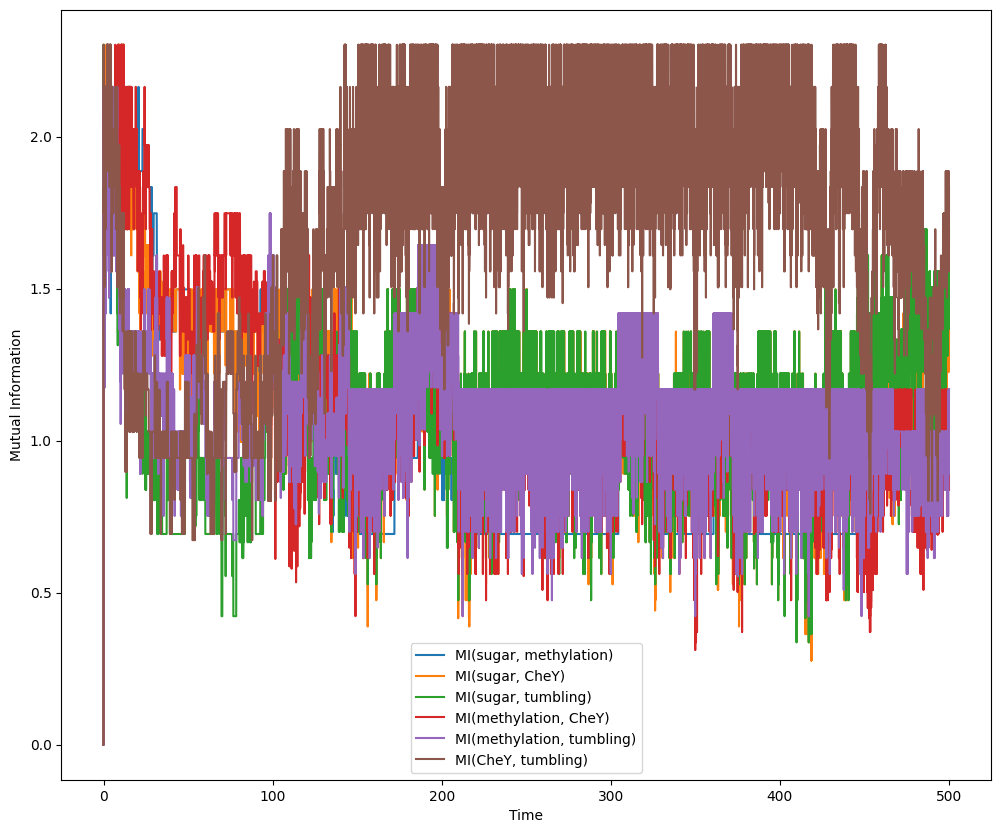

In [12]:
##Mutual information 
nbins = 30

def compute_histogram(time_series_1, time_series_2, bins):
    hist_2d, x_edges, y_edges = np.histogram2d(time_series_1, time_series_2, bins=bins)
    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    return pxy, px, py

def compute_mutual_information(time_series_1, time_series_2, bins=nbins):
    pxy, px, py = compute_histogram(time_series_1, time_series_2, bins)
    nzs = pxy > 0  # Non-zero probabilities
    mi = np.sum(pxy[nzs] * np.log(pxy[nzs] / (px[:, None] * py[None, :])[nzs]))
    return mi

def compute_instantaneous_mutual_information(all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt, bins=nbins):
    num_steps = len(all_sugar_concentrations[0])
    mi_sugar_methylation = []
    mi_sugar_CheY = []
    mi_sugar_tumbling = []
    mi_methylation_CheY = []
    mi_methylation_tumbling = []
    mi_CheY_tumbling = []

    for step in range(num_steps):
        sugar_at_step = [all_sugar_concentrations[run][step] for run in range(num_runs)]
        methylation_at_step = [all_methylation_levels[run][step] for run in range(num_runs)]
        CheY_at_step = [all_CheY_levels[run][step] for run in range(num_runs)]
        tumbling_at_step = [all_tumbling_probabilities[run][step] for run in range(num_runs)]

        mi_sugar_methylation.append(compute_mutual_information(sugar_at_step, methylation_at_step, bins))
        mi_sugar_CheY.append(compute_mutual_information(sugar_at_step, CheY_at_step, bins))
        mi_sugar_tumbling.append(compute_mutual_information(sugar_at_step, tumbling_at_step, bins))
        mi_methylation_CheY.append(compute_mutual_information(methylation_at_step, CheY_at_step, bins))
        mi_methylation_tumbling.append(compute_mutual_information(methylation_at_step, tumbling_at_step, bins))
        mi_CheY_tumbling.append(compute_mutual_information(CheY_at_step, tumbling_at_step, bins))

    return mi_sugar_methylation, mi_sugar_CheY, mi_sugar_tumbling, mi_methylation_CheY, mi_methylation_tumbling, mi_CheY_tumbling

mi_sugar_methylation, mi_sugar_CheY, mi_sugar_tumbling, mi_methylation_CheY, mi_methylation_tumbling, mi_CheY_tumbling = compute_instantaneous_mutual_information(all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt)
time = np.arange(0, duration, dt)

plt.figure(figsize=(12, 10))
plt.plot(time, mi_sugar_methylation, label='MI(sugar, methylation)')
plt.plot(time, mi_sugar_CheY, label='MI(sugar, CheY)')
plt.plot(time, mi_sugar_tumbling, label='MI(sugar, tumbling)')
plt.plot(time, mi_methylation_CheY, label='MI(methylation, CheY)')
plt.plot(time, mi_methylation_tumbling, label='MI(methylation, tumbling)')
plt.plot(time, mi_CheY_tumbling, label='MI(CheY, tumbling)')
plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.legend()
plt.show()


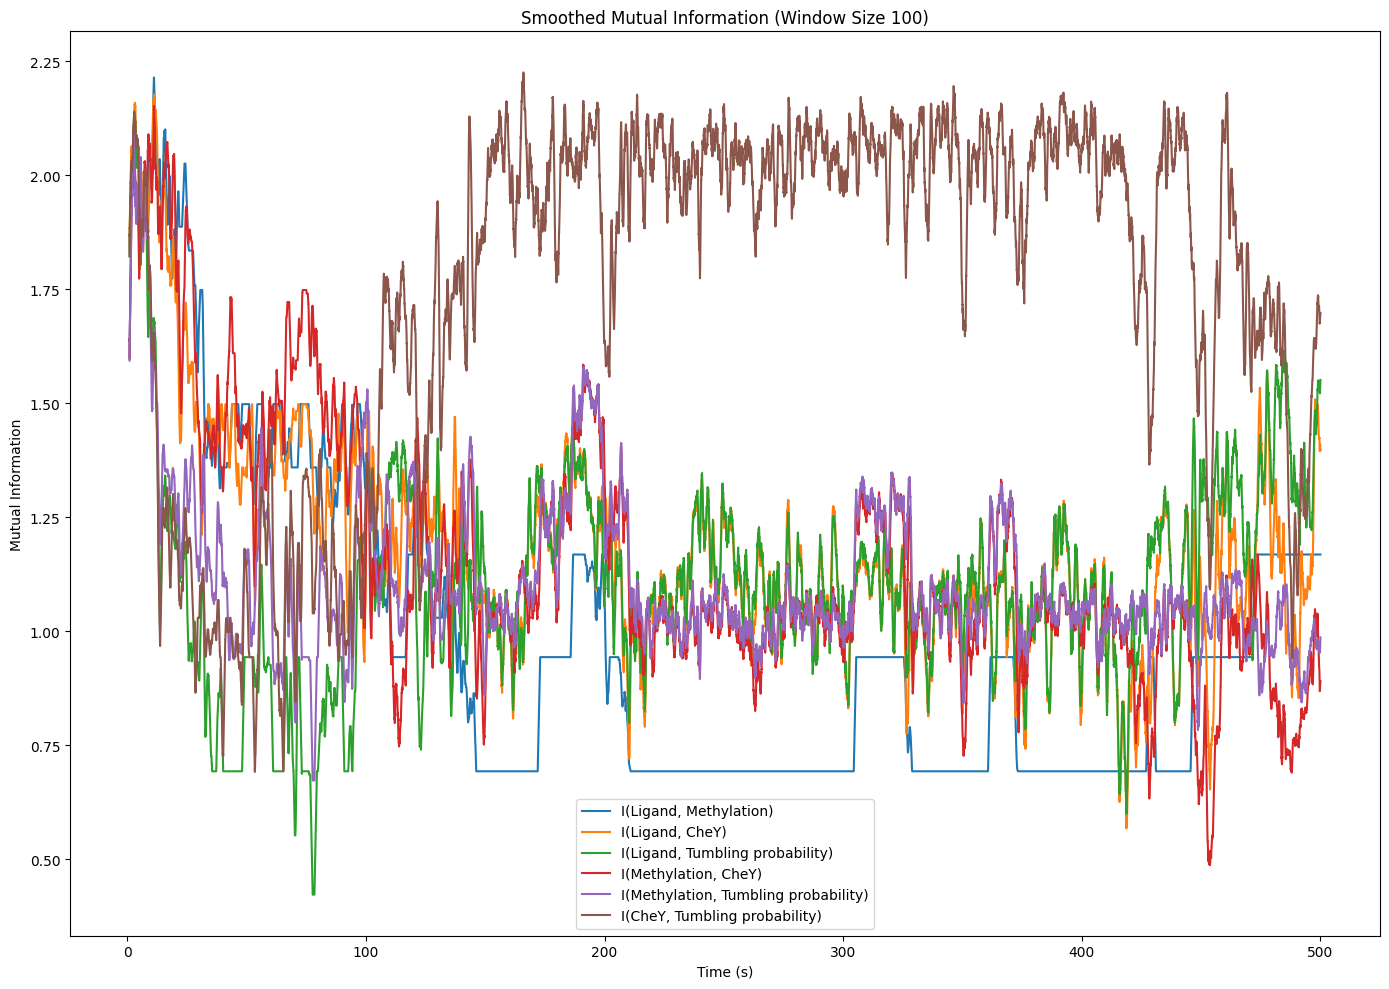

In [13]:
##Moving average of the mutual information to reduce noisiness

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

duration = 500  
dt = 0.01 
time = np.arange(0, duration, dt)

window_size = 100

smoothed_mi_sugar_methylation = moving_average(mi_sugar_methylation, window_size)
smoothed_mi_sugar_CheY = moving_average(mi_sugar_CheY, window_size)
smoothed_mi_sugar_tumbling = moving_average(mi_sugar_tumbling, window_size)
smoothed_mi_methylation_CheY = moving_average(mi_methylation_CheY, window_size)
smoothed_mi_methylation_tumbling = moving_average(mi_methylation_tumbling, window_size)
smoothed_mi_CheY_tumbling = moving_average(mi_CheY_tumbling, window_size)

smoothed_time = time[window_size - 1:]

plt.figure(figsize=(14,10))
plt.plot(smoothed_time, smoothed_mi_sugar_methylation, label='I(Ligand, Methylation)')
plt.plot(smoothed_time, smoothed_mi_sugar_CheY, label='I(Ligand, CheY)')
plt.plot(smoothed_time, smoothed_mi_sugar_tumbling, label='I(Ligand, Tumbling probability)')
plt.plot(smoothed_time, smoothed_mi_methylation_CheY, label='I(Methylation, CheY)')
plt.plot(smoothed_time, smoothed_mi_methylation_tumbling, label='I(Methylation, Tumbling probability)')
plt.plot(smoothed_time, smoothed_mi_CheY_tumbling, label='I(CheY, Tumbling probability)')
plt.xlabel('Time (s)')
plt.ylabel('Mutual Information')
plt.legend()
plt.title('Smoothed Mutual Information (Window Size 100)')

plt.tight_layout()
plt.show()



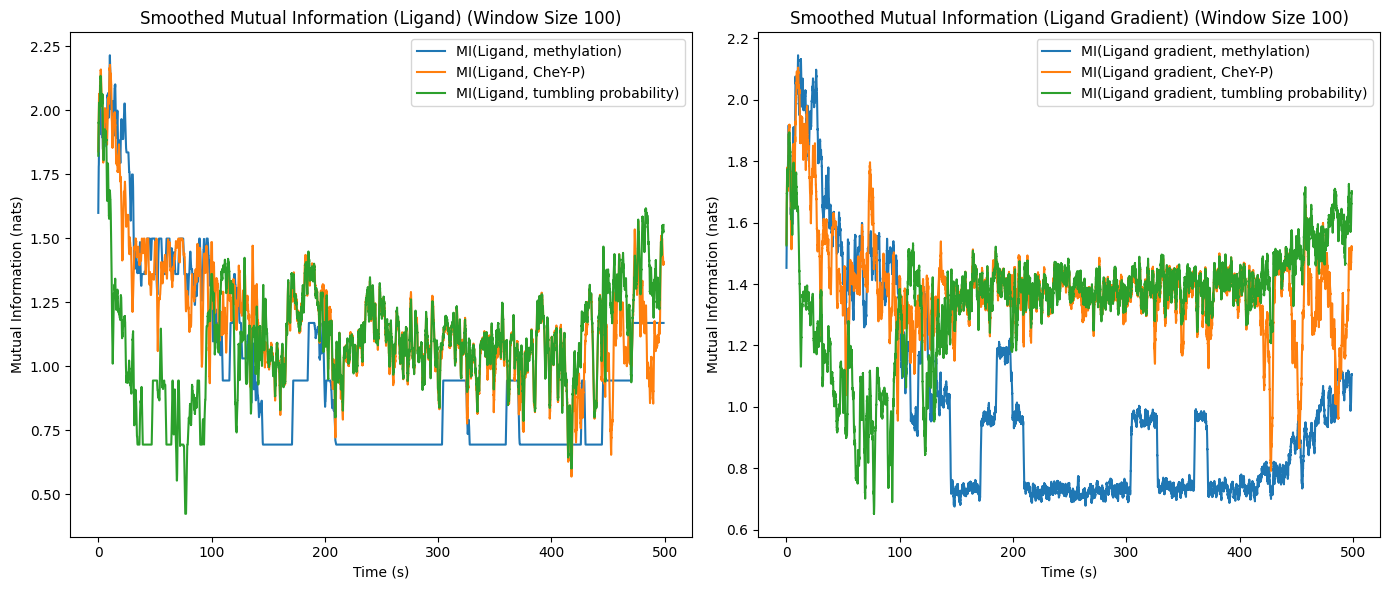

In [14]:
#MI in ligand vs ligand gradient

all_sugar_derivatives = []

for sugar_concentration in all_sugar_concentrations:
    sugar_derivative = np.gradient(sugar_concentration, dt)
    all_sugar_derivatives.append(sugar_derivative)

def compute_histogram(time_series_1, time_series_2, bins):
    hist_2d, x_edges, y_edges = np.histogram2d(time_series_1, time_series_2, bins=bins)
    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    return pxy, px, py

def compute_mutual_information(time_series_1, time_series_2, bins=nbins):
    pxy, px, py = compute_histogram(time_series_1, time_series_2, bins)
    nzs = pxy > 0  # Non-zero probabilities
    mi = np.sum(pxy[nzs] * np.log(pxy[nzs] / (px[:, None] * py[None, :])[nzs]))
    return mi

def compute_instantaneous_mutual_information(all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt, bins=nbins):
    num_steps = len(all_sugar_concentrations[0])
    mi_sugar_methylation = []
    mi_sugar_CheY = []
    mi_sugar_tumbling = []

    for step in range(num_steps):
        sugar_at_step = [all_sugar_concentrations[run][step] for run in range(num_runs)]
        methylation_at_step = [all_methylation_levels[run][step] for run in range(num_runs)]
        CheY_at_step = [all_CheY_levels[run][step] for run in range(num_runs)]
        tumbling_at_step = [all_tumbling_probabilities[run][step] for run in range(num_runs)]

        mi_sugar_methylation.append(compute_mutual_information(sugar_at_step, methylation_at_step, bins))
        mi_sugar_CheY.append(compute_mutual_information(sugar_at_step, CheY_at_step, bins))
        mi_sugar_tumbling.append(compute_mutual_information(sugar_at_step, tumbling_at_step, bins))

    return mi_sugar_methylation, mi_sugar_CheY, mi_sugar_tumbling

def compute_instantaneous_mutual_information_with_derivative(all_sugar_derivatives, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt, bins=nbins):
    num_steps = len(all_sugar_derivatives[0])
    mi_sugar_derivative_methylation = []
    mi_sugar_derivative_CheY = []
    mi_sugar_derivative_tumbling = []

    for step in range(num_steps):
        sugar_derivative_at_step = [all_sugar_derivatives[run][step] for run in range(num_runs)]
        methylation_at_step = [all_methylation_levels[run][step] for run in range(num_runs)]
        CheY_at_step = [all_CheY_levels[run][step] for run in range(num_runs)]
        tumbling_at_step = [all_tumbling_probabilities[run][step] for run in range(num_runs)]

        mi_sugar_derivative_methylation.append(compute_mutual_information(sugar_derivative_at_step, methylation_at_step, bins))
        mi_sugar_derivative_CheY.append(compute_mutual_information(sugar_derivative_at_step, CheY_at_step, bins))
        mi_sugar_derivative_tumbling.append(compute_mutual_information(sugar_derivative_at_step, tumbling_at_step, bins))

    return mi_sugar_derivative_methylation, mi_sugar_derivative_CheY, mi_sugar_derivative_tumbling

# Compute mutual information for regular ligand concentration
mi_sugar_methylation, mi_sugar_CheY, mi_sugar_tumbling = compute_instantaneous_mutual_information(all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt)

# Compute mutual information for ligand gradient
mi_sugar_derivative_methylation, mi_sugar_derivative_CheY, mi_sugar_derivative_tumbling = compute_instantaneous_mutual_information_with_derivative(all_sugar_derivatives, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt)

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Apply smoothing
window_size = 100 
mi_sugar_methylation_smooth = moving_average(mi_sugar_methylation, window_size)
mi_sugar_CheY_smooth = moving_average(mi_sugar_CheY, window_size)
mi_sugar_tumbling_smooth = moving_average(mi_sugar_tumbling, window_size)

mi_sugar_derivative_methylation_smooth = moving_average(mi_sugar_derivative_methylation, window_size)
mi_sugar_derivative_CheY_smooth = moving_average(mi_sugar_derivative_CheY, window_size)
mi_sugar_derivative_tumbling_smooth = moving_average(mi_sugar_derivative_tumbling, window_size)

time_smooth = time[:len(mi_sugar_methylation_smooth)]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(time_smooth, mi_sugar_methylation_smooth, label='MI(Ligand, methylation)')
plt.plot(time_smooth, mi_sugar_CheY_smooth, label='MI(Ligand, CheY-P)')
plt.plot(time_smooth, mi_sugar_tumbling_smooth, label='MI(Ligand, tumbling probability)')
plt.xlabel('Time (s)')
plt.ylabel('Mutual Information (nats)')
plt.title('Smoothed Mutual Information (Ligand) (Window Size {})'.format(window_size))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_smooth, mi_sugar_derivative_methylation_smooth, label='MI(Ligand gradient, methylation)')
plt.plot(time_smooth, mi_sugar_derivative_CheY_smooth, label='MI(Ligand gradient, CheY-P)')
plt.plot(time_smooth, mi_sugar_derivative_tumbling_smooth, label='MI(Ligand gradient, tumbling probability)')
plt.xlabel('Time (s)')
plt.ylabel('Mutual Information (nats)')
plt.title('Smoothed Mutual Information (Ligand Gradient) (Window Size {})'.format(window_size))
plt.legend()

plt.tight_layout()
plt.show()


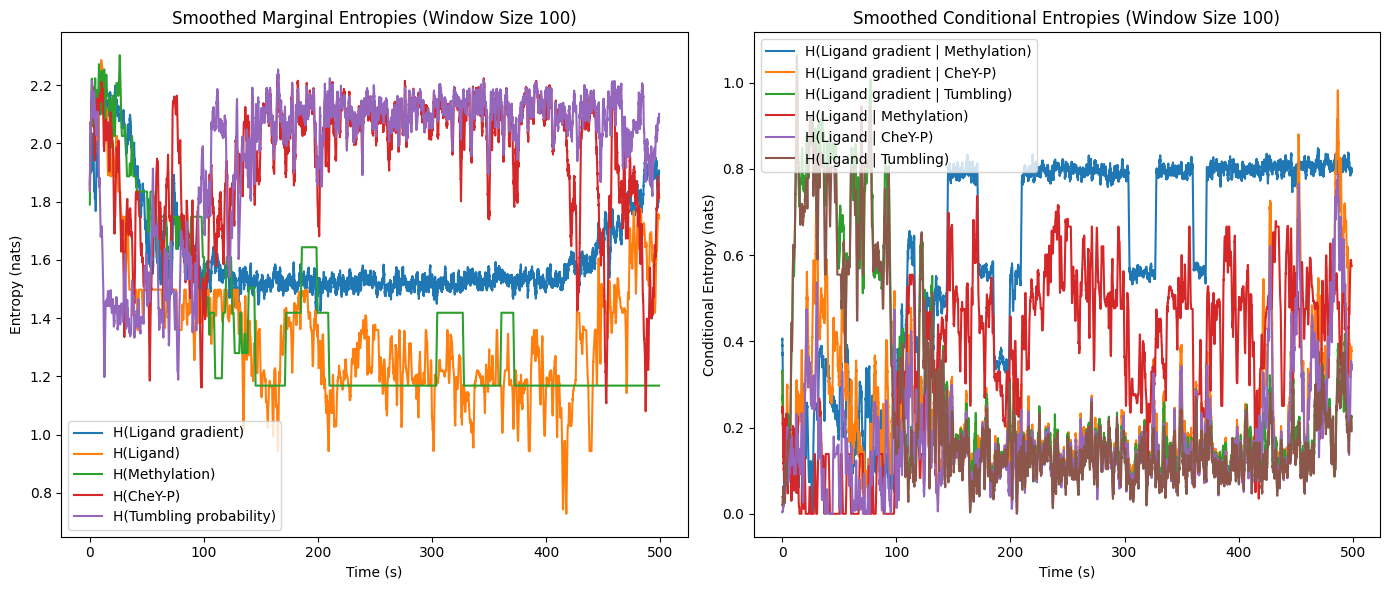

In [15]:
##Marginal and conditional entropies

def compute_entropy(prob_dist):
    nzs = prob_dist > 0  # Non-zero probabilities
    entropy = -np.sum(prob_dist[nzs] * np.log(prob_dist[nzs]))
    return entropy

def compute_histogram(time_series_1, time_series_2, bins):
    hist_2d, x_edges, y_edges = np.histogram2d(time_series_1, time_series_2, bins=bins)
    pxy = hist_2d / float(np.sum(hist_2d)) #joint
    px = np.sum(pxy, axis=1) #marginal
    py = np.sum(pxy, axis=0) #marginal
    return pxy, px, py

def compute_mutual_information_and_entropies(time_series_1, time_series_2, bins=30):
    pxy, px, py = compute_histogram(time_series_1, time_series_2, bins)
    nzs = pxy > 0  # Non-zero probabilities
    
    # Compute Mutual Information
    mi = np.sum(pxy[nzs] * np.log(pxy[nzs] / (px[:, None] * py[None, :])[nzs]))
    
    # Compute Entropies
    H_x = compute_entropy(px)
    H_y = compute_entropy(py)
    H_xy = compute_entropy(pxy.flatten())
    H_x_given_y = H_xy - H_y
    
    return mi, H_x, H_x_given_y

def compute_marginal_entropies(all_ligand_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt, bins=30):
    num_steps = len(all_ligand_concentrations[0])
    
    H_ligand = []
    H_methylation = []
    H_CheY = []
    H_tumbling = []

    for step in range(num_steps):
        ligand_at_step = [all_ligand_concentrations[run][step] for run in range(num_runs)]
        methylation_at_step = [all_methylation_levels[run][step] for run in range(num_runs)]
        CheY_at_step = [all_CheY_levels[run][step] for run in range(num_runs)]
        tumbling_at_step = [all_tumbling_probabilities[run][step] for run in range(num_runs)]
        
        _, px, _ = compute_histogram(ligand_at_step, ligand_at_step, bins)
        H_ligand.append(compute_entropy(px))
        
        _, px, _ = compute_histogram(methylation_at_step, methylation_at_step, bins)
        H_methylation.append(compute_entropy(px))
        
        _, px, _ = compute_histogram(CheY_at_step, CheY_at_step, bins)
        H_CheY.append(compute_entropy(px))
        
        _, px, _ = compute_histogram(tumbling_at_step, tumbling_at_step, bins)
        H_tumbling.append(compute_entropy(px))

    return H_ligand, H_methylation, H_CheY, H_tumbling

def compute_instantaneous_mutual_information_with_derivative_and_entropies(all_sugar_concentrations, all_sugar_derivatives, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt, bins=30):
    num_steps = len(all_sugar_derivatives[0])
    
    mi_sugar_derivative_methylation = []
    H_sugar_derivative = []
    H_sugar_derivative_given_methylation = []
    
    mi_sugar_derivative_CheY = []
    H_sugar_derivative_given_CheY = []
    
    mi_sugar_derivative_tumbling = []
    H_sugar_derivative_given_tumbling = []
    
    H_ligand_given_methylation = []
    H_ligand_given_CheY = []
    H_ligand_given_tumbling = []

    for step in range(num_steps):
        sugar_derivative_at_step = [all_sugar_derivatives[run][step] for run in range(num_runs)]
        
        # Methylation
        methylation_at_step = [all_methylation_levels[run][step] for run in range(num_runs)]
        mi, H_x, H_x_given_y = compute_mutual_information_and_entropies(sugar_derivative_at_step, methylation_at_step, bins)
        mi_sugar_derivative_methylation.append(mi)
        H_sugar_derivative.append(H_x)
        H_sugar_derivative_given_methylation.append(H_x_given_y)
        
        ligand_at_step = [all_sugar_concentrations[run][step] for run in range(num_runs)]
        mi, H_x, H_x_given_y = compute_mutual_information_and_entropies(ligand_at_step, methylation_at_step, bins)
        H_ligand_given_methylation.append(H_x_given_y)
        
        # CheY-P
        CheY_at_step = [all_CheY_levels[run][step] for run in range(num_runs)]
        mi, _, H_x_given_y = compute_mutual_information_and_entropies(sugar_derivative_at_step, CheY_at_step, bins)
        mi_sugar_derivative_CheY.append(mi)
        H_sugar_derivative_given_CheY.append(H_x_given_y)
        
        mi, _, H_x_given_y = compute_mutual_information_and_entropies(ligand_at_step, CheY_at_step, bins)
        H_ligand_given_CheY.append(H_x_given_y)
        
        # Tumbling probability
        tumbling_at_step = [all_tumbling_probabilities[run][step] for run in range(num_runs)]
        mi, _, H_x_given_y = compute_mutual_information_and_entropies(sugar_derivative_at_step, tumbling_at_step, bins)
        mi_sugar_derivative_tumbling.append(mi)
        H_sugar_derivative_given_tumbling.append(H_x_given_y)
        
        mi, _, H_x_given_y = compute_mutual_information_and_entropies(ligand_at_step, tumbling_at_step, bins)
        H_ligand_given_tumbling.append(H_x_given_y)

    return (mi_sugar_derivative_methylation, H_sugar_derivative, H_sugar_derivative_given_methylation,
            mi_sugar_derivative_CheY, H_sugar_derivative_given_CheY,
            mi_sugar_derivative_tumbling, H_sugar_derivative_given_tumbling,
            H_ligand_given_methylation, H_ligand_given_CheY, H_ligand_given_tumbling)

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Compute the instantaneous derivatives of ligand concentrations
all_sugar_derivatives = []
for sugar_concentration in all_sugar_concentrations:
    sugar_derivative = np.gradient(sugar_concentration, dt)
    all_sugar_derivatives.append(sugar_derivative)

results = compute_instantaneous_mutual_information_with_derivative_and_entropies(
    all_sugar_concentrations, all_sugar_derivatives, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt
)

(mi_sugar_derivative_methylation, H_sugar_derivative, H_sugar_derivative_given_methylation,
 mi_sugar_derivative_CheY, H_sugar_derivative_given_CheY,
 mi_sugar_derivative_tumbling, H_sugar_derivative_given_tumbling,
 H_ligand_given_methylation, H_ligand_given_CheY, H_ligand_given_tumbling) = results

H_ligand, H_methylation, H_CheY, H_tumbling = compute_marginal_entropies(
    all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt
)

# Apply smoothing
window_size = 100
H_sugar_derivative_smooth = moving_average(H_sugar_derivative, window_size)
H_ligand_smooth = moving_average(H_ligand, window_size)
H_methylation_smooth = moving_average(H_methylation, window_size)
H_CheY_smooth = moving_average(H_CheY, window_size)
H_tumbling_smooth = moving_average(H_tumbling, window_size)

H_sugar_derivative_given_methylation_smooth = moving_average(H_sugar_derivative_given_methylation, window_size)
H_sugar_derivative_given_CheY_smooth = moving_average(H_sugar_derivative_given_CheY, window_size)
H_sugar_derivative_given_tumbling_smooth = moving_average(H_sugar_derivative_given_tumbling, window_size)

H_ligand_given_methylation_smooth = moving_average(H_ligand_given_methylation, window_size)
H_ligand_given_CheY_smooth = moving_average(H_ligand_given_CheY, window_size)
H_ligand_given_tumbling_smooth = moving_average(H_ligand_given_tumbling, window_size)

time_smooth = time[:len(H_ligand_smooth)]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(time_smooth, H_sugar_derivative_smooth, label='H(Ligand gradient)')
plt.plot(time[:len(H_ligand_smooth)], H_ligand_smooth, label='H(Ligand)')
plt.plot(time[:len(H_methylation_smooth)], H_methylation_smooth, label='H(Methylation)')
plt.plot(time[:len(H_CheY_smooth)], H_CheY_smooth, label='H(CheY-P)')
plt.plot(time[:len(H_tumbling_smooth)], H_tumbling_smooth, label='H(Tumbling probability)')
plt.xlabel('Time (s)')
plt.ylabel('Entropy (nats)')
plt.title('Smoothed Marginal Entropies (Window Size {})'.format(window_size))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_smooth, H_sugar_derivative_given_methylation_smooth, label='H(Ligand gradient | Methylation)')
plt.plot(time_smooth, H_sugar_derivative_given_CheY_smooth, label='H(Ligand gradient | CheY-P)')
plt.plot(time_smooth, H_sugar_derivative_given_tumbling_smooth, label='H(Ligand gradient | Tumbling)')
plt.plot(time_smooth, H_ligand_given_methylation_smooth, label='H(Ligand | Methylation)')
plt.plot(time_smooth, H_ligand_given_CheY_smooth, label='H(Ligand | CheY-P)')
plt.plot(time_smooth, H_ligand_given_tumbling_smooth, label='H(Ligand | Tumbling)')
plt.xlabel('Time (s)')
plt.ylabel('Conditional Entropy (nats)')
plt.title('Smoothed Conditional Entropies (Window Size {})'.format(window_size))
plt.legend()

plt.tight_layout()
plt.show()


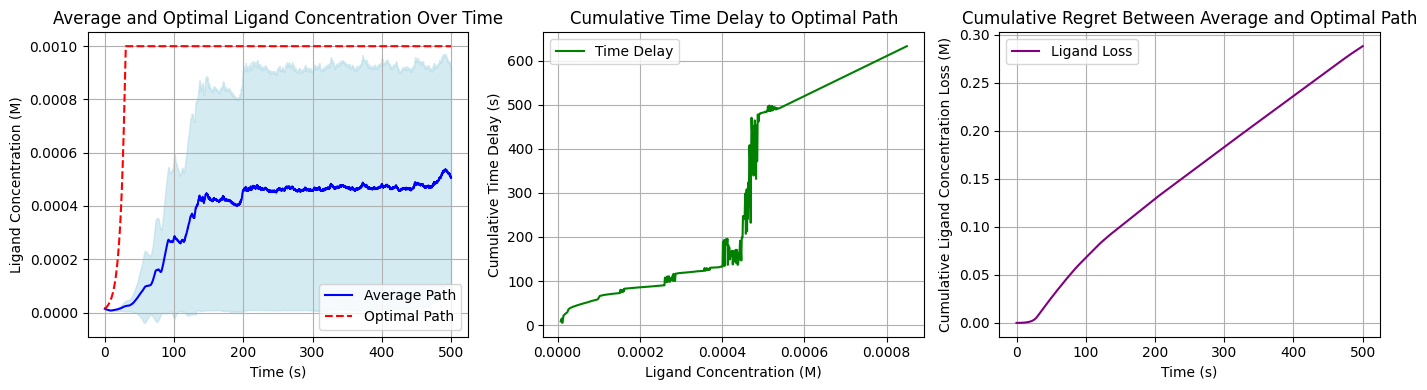

In [18]:
## Optimal path: Regret and time delay 

start_position = np.array([0, 0])  
source_position = np.array([3000, -3000])  
total_distance_to_source = np.linalg.norm(source_position - start_position)
dt = 0.01  
total_timesteps_to_source = int(30 / dt)  # Perfect trajectory in 30 seconds
total_time = 500 
time_array = np.arange(0, total_time, dt)

num_points = len(time_array)

def sugar_concentration(positions):
    X, Y = positions
    decay_rate = 0.001  
    distance = np.sqrt((X - source_position[0])**2 + (Y - source_position[1])**2)
    concentration = np.exp(-decay_rate * distance) * 1e-3
    return concentration

optimal_positions = []
current_position = start_position.copy()
for _ in range(total_timesteps_to_source):
    optimal_positions.append(current_position.copy())
    current_position[0] += (source_position[0] - start_position[0]) / total_timesteps_to_source
    current_position[1] += (source_position[1] - start_position[1]) / total_timesteps_to_source

# Fill remaining positions after reaching the source
while len(optimal_positions) < num_points:
    optimal_positions.append(source_position.copy())

optimal_positions = np.array(optimal_positions).T
optimal_sugar_concentrations = sugar_concentration(optimal_positions)

sugar_loss = optimal_sugar_concentrations - avg_sugar_concentrations

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

axs[0].errorbar(time_array, avg_sugar_concentrations, yerr=std_sugar_concentrations, color='blue', ecolor='lightblue', label='Average Sugar Concentration')
axs[0].plot(time_array, optimal_sugar_concentrations, color='red', linestyle='--', label='Optimal Sugar Concentration')
axs[0].set_title('Average and Optimal Ligand Concentration Over Time')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Ligand Concentration')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(time_array, sugar_loss, color='green', label='Sugar Loss Compared to Optimal Path')
axs[1].set_title('Sugar Loss Over Time')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Sugar Loss')
axs[1].legend()
axs[1].grid(True)

cumulative_sugar_loss = np.cumsum(sugar_loss) * dt
axs[2].plot(time_array, cumulative_sugar_loss, color='purple', label='Cumulative Sugar Loss')
axs[2].set_title('Cumulative Sugar Loss Over Time')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Cumulative Sugar Loss')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
##More on optimal trajectory 

start_position = np.array([0, 0])  
source_position = np.array([3000, -3000])  
total_distance_to_source = np.linalg.norm(source_position - start_position)
dt = 0.01  
total_timesteps_to_source = int(30 / dt)  # Perfect trajectory in 30 seconds
total_time = 500 
time_array = np.arange(0, total_time, dt)

num_points = len(time_array)

def sugar_concentration(positions):
    X, Y = positions
    decay_rate = 0.001  
    distance = np.sqrt((X - source_position[0])**2 + (Y - source_position[1])**2)
    concentration = np.exp(-decay_rate * distance) * 1e-3
    return concentration

optimal_positions = []
current_position = start_position.copy()
for _ in range(total_timesteps_to_source):
    optimal_positions.append(current_position.copy())
    current_position[0] += (source_position[0] - start_position[0]) / total_timesteps_to_source
    current_position[1] += (source_position[1] - start_position[1]) / total_timesteps_to_source

# Fill remaining positions after reaching the source
while len(optimal_positions) < num_points:
    optimal_positions.append(source_position.copy())

optimal_positions = np.array(optimal_positions).T
optimal_sugar_concentrations = sugar_concentration(optimal_positions)

# Interpolate the average sugar concentration
interp_avg_sugar = interp1d(avg_sugar_concentrations, time_array, bounds_error=False, fill_value='extrapolate')
interp_opt_sugar = interp1d(time_array, optimal_sugar_concentrations, fill_value="extrapolate")

common_concentrations = np.linspace(min(avg_sugar_concentrations.min(), optimal_sugar_concentrations.min()), 
                                    max(avg_sugar_concentrations.max(), optimal_sugar_concentrations.max()), 
                                    num=1000)

avg_times = interp_avg_sugar(common_concentrations)
opt_times = interp_opt_sugar(common_concentrations)

time_errors = avg_times - opt_times

valid_indices = common_concentrations < 0.00085 ##above this concentration the analysis is meaningless
filtered_concentrations = common_concentrations[valid_indices]
filtered_time_errors = time_errors[valid_indices]

non_cumulative_time_errors = np.diff(filtered_time_errors, prepend=filtered_time_errors[0])

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

axs[0].plot(time_array, avg_sugar_concentrations, color='blue', label='Average Path')
axs[0].fill_between(time_array, avg_sugar_concentrations - std_sugar_concentrations, avg_sugar_concentrations + std_sugar_concentrations, color='lightblue', alpha=0.5)

#axs[0].errorbar(time_array, avg_sugar_concentrations, yerr=std_sugar_concentrations, color='blue', ecolor='lightblue', label='Average Sugar Concentration')
axs[0].plot(time_array, optimal_sugar_concentrations, color='red', linestyle='--', label='Optimal Path')
axs[0].set_title('Average and Optimal Ligand Concentration Over Time')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Ligand Concentration (M)')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(filtered_concentrations, filtered_time_errors, color='green', label='Time Delay')
axs[1].set_title('Cumulative Time Delay to Optimal Path')
axs[1].set_xlabel('Ligand Concentration (M)')
axs[1].set_ylabel('Cumulative Time Delay (s)')
axs[1].legend()
axs[1].grid(True)

#axs[2].plot(filtered_concentrations, non_cumulative_time_errors, color='purple', label='Instantaneous Time Delay')
#axs[2].set_title('Instantaneous Time Delay to Optimal Path')
#axs[2].set_xlabel('Ligand Concentration')
#axs[2].set_ylabel('Instantaneous Time Delay (s)')
#axs[2].legend()
#axs[2].grid(True)

cumulative_sugar_loss = np.cumsum(sugar_loss) * dt
axs[2].plot(time_array, cumulative_sugar_loss, color='purple', label='Ligand Loss')
axs[2].set_title('Cumulative Regret Between Average and Optimal Path')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Cumulative Ligand Concentration Loss (M)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


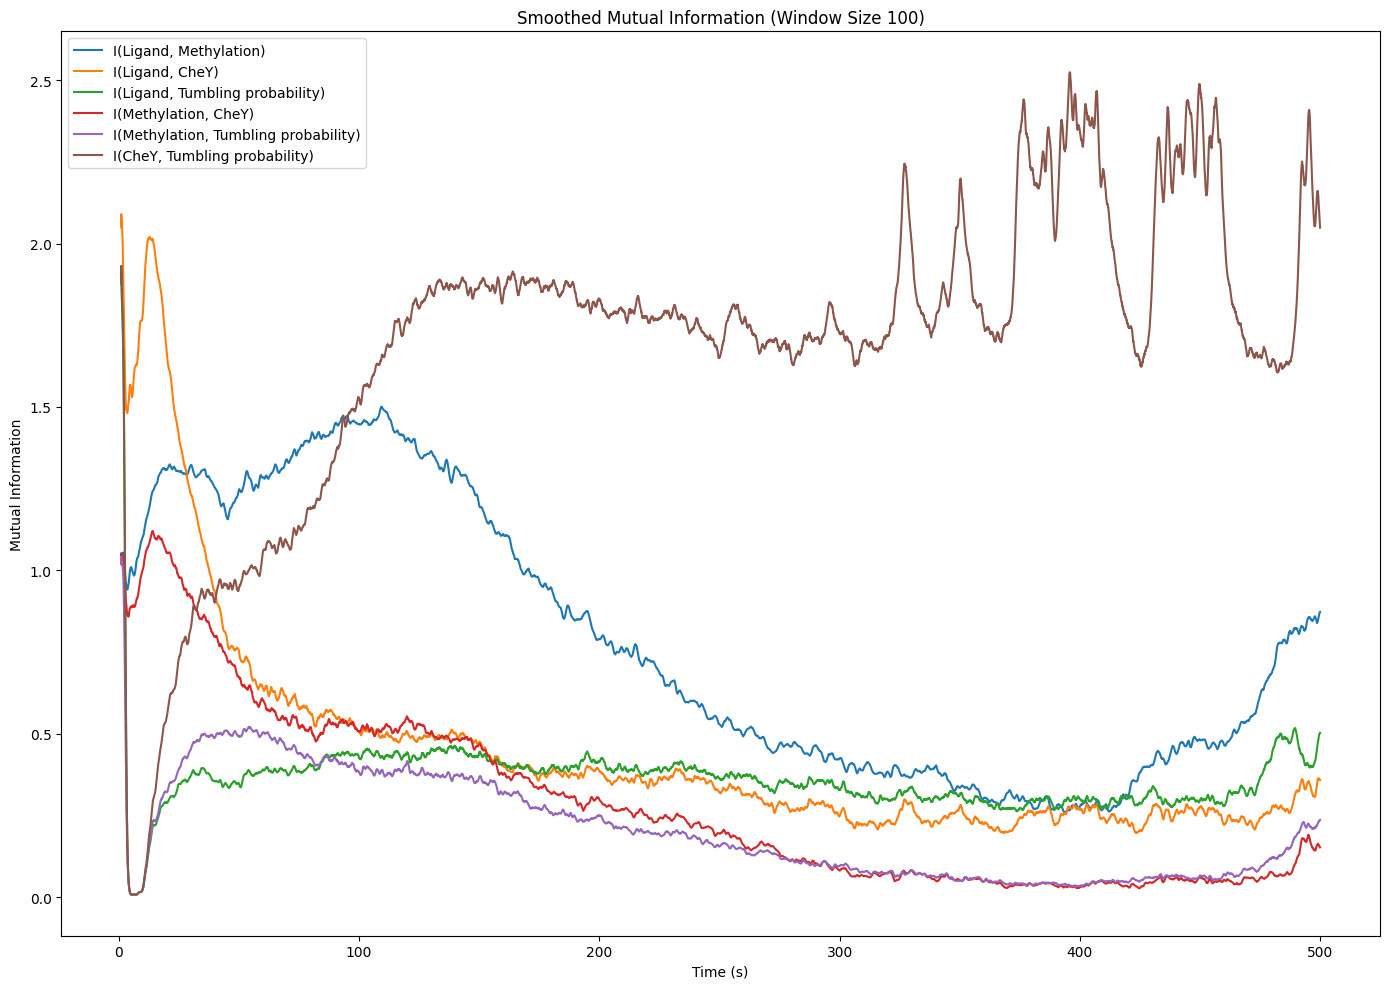

In [ ]:
##Heat maps to show how data is distributed after running the average of many simulations

##Warning: depending on the amount of runs, this code can take a long time to run. For averaging a 1000 runs, expect ~90 minutes of run time.

def create_heatmaps(all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, duration, dt):
    num_time_steps = int(duration / dt)
    time_array = np.arange(0, duration, dt)

    #number of bins for the histograms
    num_bins = 50

    plt.figure(figsize=(16, 16))

    plt.subplot(2, 2, 1)
    sugar_histograms = np.array([np.histogram(all_sugar_concentrations[:, t], bins=num_bins, range=(0, np.max(all_sugar_concentrations)))[0] for t in range(num_time_steps)])
    plt.imshow(sugar_histograms.T, aspect='auto', extent=[0, duration, 0, np.max(all_sugar_concentrations)], origin='lower', cmap='hot')
    plt.colorbar(label='Count')
    plt.title('Sugar Concentration Distribution Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Sugar Concentration')

    plt.subplot(2, 2, 2)
    methylation_histograms = np.array([np.histogram(all_methylation_levels[:, t], bins=num_bins, range=(0, np.max(all_methylation_levels)))[0] for t in range(num_time_steps)])
    plt.imshow(methylation_histograms.T, aspect='auto', extent=[0, duration, 0, np.max(all_methylation_levels)], origin='lower', cmap='hot')
    plt.colorbar(label='Count')
    plt.title('Methylation Level Distribution Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Methylation Level')

    plt.subplot(2, 2, 3)
    CheY_histograms = np.array([np.histogram(all_CheY_levels[:, t], bins=num_bins, range=(0, np.max(all_CheY_levels)))[0] for t in range(num_time_steps)])
    plt.imshow(CheY_histograms.T, aspect='auto', extent=[0, duration, 0, np.max(all_CheY_levels)], origin='lower', cmap='hot')
    plt.colorbar(label='Count')
    plt.title('CheY-P Level Distribution Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('CheY-P Level')

    plt.subplot(2, 2, 4)
    tumbling_histograms = np.array([np.histogram(all_tumbling_probabilities[:, t], bins=num_bins, range=(0, np.max(all_tumbling_probabilities)))[0] for t in range(num_time_steps)])
    plt.imshow(tumbling_histograms.T, aspect='auto', extent=[0, duration, 0, np.max(all_tumbling_probabilities)], origin='lower', cmap='hot')
    plt.colorbar(label='Count')
    plt.title('Tumbling Probability Distribution Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Tumbling Probability')

    plt.tight_layout()
    plt.show()

all_sugar_concentrations = np.array(all_sugar_concentrations)
all_methylation_levels = np.array(all_methylation_levels)
all_CheY_levels = np.array(all_CheY_levels)
all_tumbling_probabilities = np.array(all_tumbling_probabilities)

create_heatmaps(all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, duration, dt)


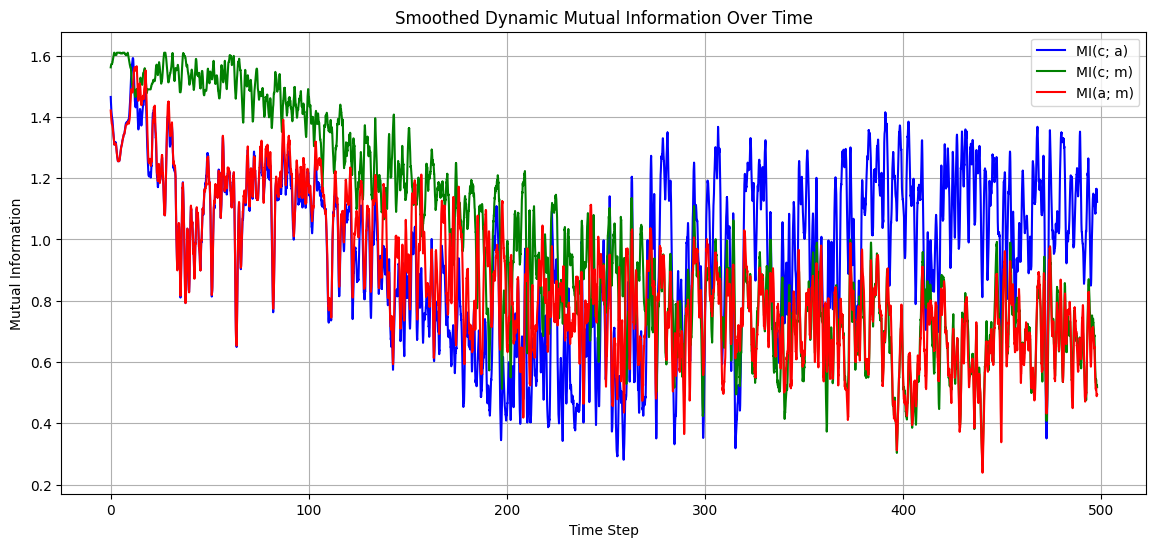

In [ ]:
##Demonstrate number of bins effect of MI.

nbins_list = [20, 30, 40]

def compute_histogram(time_series_1, time_series_2, bins):
    hist_2d, x_edges, y_edges = np.histogram2d(time_series_1, time_series_2, bins=bins)
    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    return pxy, px, py

def compute_mutual_information(time_series_1, time_series_2, bins):
    pxy, px, py = compute_histogram(time_series_1, time_series_2, bins)
    nzs = pxy > 0  # Non-zero probabilities
    mi = np.sum(pxy[nzs] * np.log(pxy[nzs] / (px[:, None] * py[None, :])[nzs]))
    return mi

def compute_instantaneous_mutual_information(all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt, bins):
    num_steps = len(all_sugar_concentrations[0])
    mi_sugar_methylation = []
    mi_sugar_CheY = []
    mi_sugar_tumbling = []
    mi_methylation_CheY = []
    mi_methylation_tumbling = []
    mi_CheY_tumbling = []

    for step in range(num_steps):
        sugar_at_step = [all_sugar_concentrations[run][step] for run in range(num_runs)]
        methylation_at_step = [all_methylation_levels[run][step] for run in range(num_runs)]
        CheY_at_step = [all_CheY_levels[run][step] for run in range(num_runs)]
        tumbling_at_step = [all_tumbling_probabilities[run][step] for run in range(num_runs)]

        mi_sugar_methylation.append(compute_mutual_information(sugar_at_step, methylation_at_step, bins))
        mi_sugar_CheY.append(compute_mutual_information(sugar_at_step, CheY_at_step, bins))
        mi_sugar_tumbling.append(compute_mutual_information(sugar_at_step, tumbling_at_step, bins))
        mi_methylation_CheY.append(compute_mutual_information(methylation_at_step, CheY_at_step, bins))
        mi_methylation_tumbling.append(compute_mutual_information(methylation_at_step, tumbling_at_step, bins))
        mi_CheY_tumbling.append(compute_mutual_information(CheY_at_step, tumbling_at_step, bins))

    return mi_sugar_methylation, mi_sugar_CheY, mi_sugar_tumbling, mi_methylation_CheY, mi_methylation_tumbling, mi_CheY_tumbling

# Compute mutual information for different bin sizes
mi_results = []
for nbins in nbins_list:
    mi_results.append(compute_instantaneous_mutual_information(all_sugar_concentrations, all_methylation_levels, all_CheY_levels, all_tumbling_probabilities, num_runs, dt, bins=nbins))

time = np.arange(0, duration, dt)

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(time, mi_results[0][0], label='MI(sugar, methylation)')
plt.plot(time, mi_results[0][1], label='MI(sugar, CheY)')
plt.plot(time, mi_results[0][2], label='MI(sugar, tumbling)')
plt.plot(time, mi_results[0][3], label='MI(methylation, CheY)')
plt.plot(time, mi_results[0][4], label='MI(methylation, tumbling)')
plt.plot(time, mi_results[0][5], label='MI(CheY, tumbling)')
plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.title('Mutual Information (nbins = 20)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(time, mi_results[1][0], label='MI(sugar, methylation)')
plt.plot(time, mi_results[1][1], label='MI(sugar, CheY)')
plt.plot(time, mi_results[1][2], label='MI(sugar, tumbling)')
plt.plot(time, mi_results[1][3], label='MI(methylation, CheY)')
plt.plot(time, mi_results[1][4], label='MI(methylation, tumbling)')
plt.plot(time, mi_results[1][5], label='MI(CheY, tumbling)')
plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.title('Mutual Information (nbins = 30)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(time, mi_results[2][0], label='MI(sugar, methylation)')
plt.plot(time, mi_results[2][1], label='MI(sugar, CheY)')
plt.plot(time, mi_results[2][2], label='MI(sugar, tumbling)')
plt.plot(time, mi_results[2][3], label='MI(methylation, CheY)')
plt.plot(time, mi_results[2][4], label='MI(methylation, tumbling)')
plt.plot(time, mi_results[2][5], label='MI(CheY, tumbling)')
plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.title('Mutual Information (nbins = 40)')
plt.legend()

plt.tight_layout()
plt.show()
